<a href="https://colab.research.google.com/github/dhcryan/kaggle_challenge_/blob/main/week5/minsik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
holev = pd.read_csv('/content/holidays_events.csv')
oil = pd.read_csv('/content/oil.csv')
samsub = pd.read_csv('/content/sample_submission.csv')
store = pd.read_csv('/content/stores.csv')
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')
trans = pd.read_csv('/content/transactions.csv')

In [ ]:
holev.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
samsub.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [ ]:
store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0


In [ ]:
trans.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
train["date"] = pd.to_datetime(train.date)
test["date"] = pd.to_datetime(test.date)
trans["date"] = pd.to_datetime(trans.date)

In [ ]:
train.onpromotion = train.onpromotion.astype("float32")
train.sales = train.sales.astype("float32")

In [ ]:
trans_re = trans.set_index("date").resample("D").transactions.mean().reset_index()
trans_re["year"] = trans_re.date.dt.year
px.line(trans_re, x='date', y='transactions')

In [ ]:
train.tail()

,id,date,store_nbr,family,sales,onpromotion
267805,267805,2013-05-31,23.0,EGGS,46.0,0.0
267806,267806,2013-05-31,23.0,FROZEN FOODS,33.0,0.0
267807,267807,2013-05-31,23.0,GROCERY I,1737.0,0.0
267808,267808,2013-05-31,23.0,GROCERY II,17.0,0.0
267809,267,NaT,NaN,NaN,NaN,NaN


In [ ]:
train['store_nbr'].value_counts()

1.0     4983
17.0    4983
10.0    4983
22.0    4983
21.0    4983
2.0     4983
19.0    4983
18.0    4983
20.0    4983
16.0    4983
15.0    4983
14.0    4983
13.0    4983
12.0    4983
11.0    4983
23.0    4964
5.0     4950
43.0    4950
44.0    4950
45.0    4950
46.0    4950
47.0    4950
48.0    4950
49.0    4950
7.0     4950
50.0    4950
51.0    4950
52.0    4950
53.0    4950
54.0    4950
6.0     4950
41.0    4950
8.0     4950
42.0    4950
34.0    4950
40.0    4950
30.0    4950
24.0    4950
25.0    4950
26.0    4950
27.0    4950
28.0    4950
29.0    4950
3.0     4950
31.0    4950
4.0     4950
32.0    4950
33.0    4950
35.0    4950
36.0    4950
37.0    4950
38.0    4950
39.0    4950
9.0     4950
Name: store_nbr, dtype: int64

In [ ]:
store['type'].value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

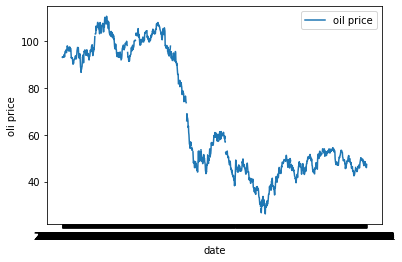

In [ ]:
transnb1 = trans[trans['store_nbr'] == 1]
plt.plot(oil['date'],oil['dcoilwtico'],linestyle = 'solid',label = 'oil price')
plt.xlabel('date')
plt.ylabel('oli price')
plt.legend()
plt.show()

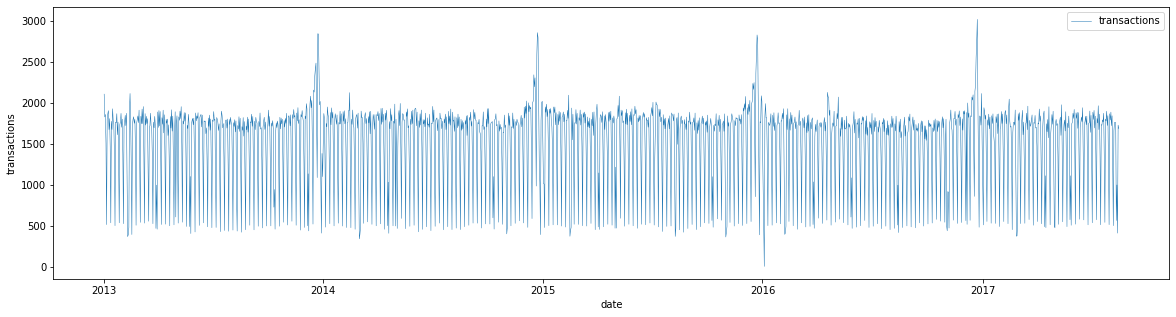

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(transnb1['date'],transnb1['transactions'],linewidth = 0.5,label = 'transactions')
plt.xlabel('date')
plt.ylabel('transactions')
plt.legend()
plt.show()

In [ ]:
oil['date'] = pd.to_datetime(oil.date)

In [ ]:
nb_list = train['store_nbr'].unique()
nb_list = np.delete(nb_list,-1)
nb_list.sort()
nb_list

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54])

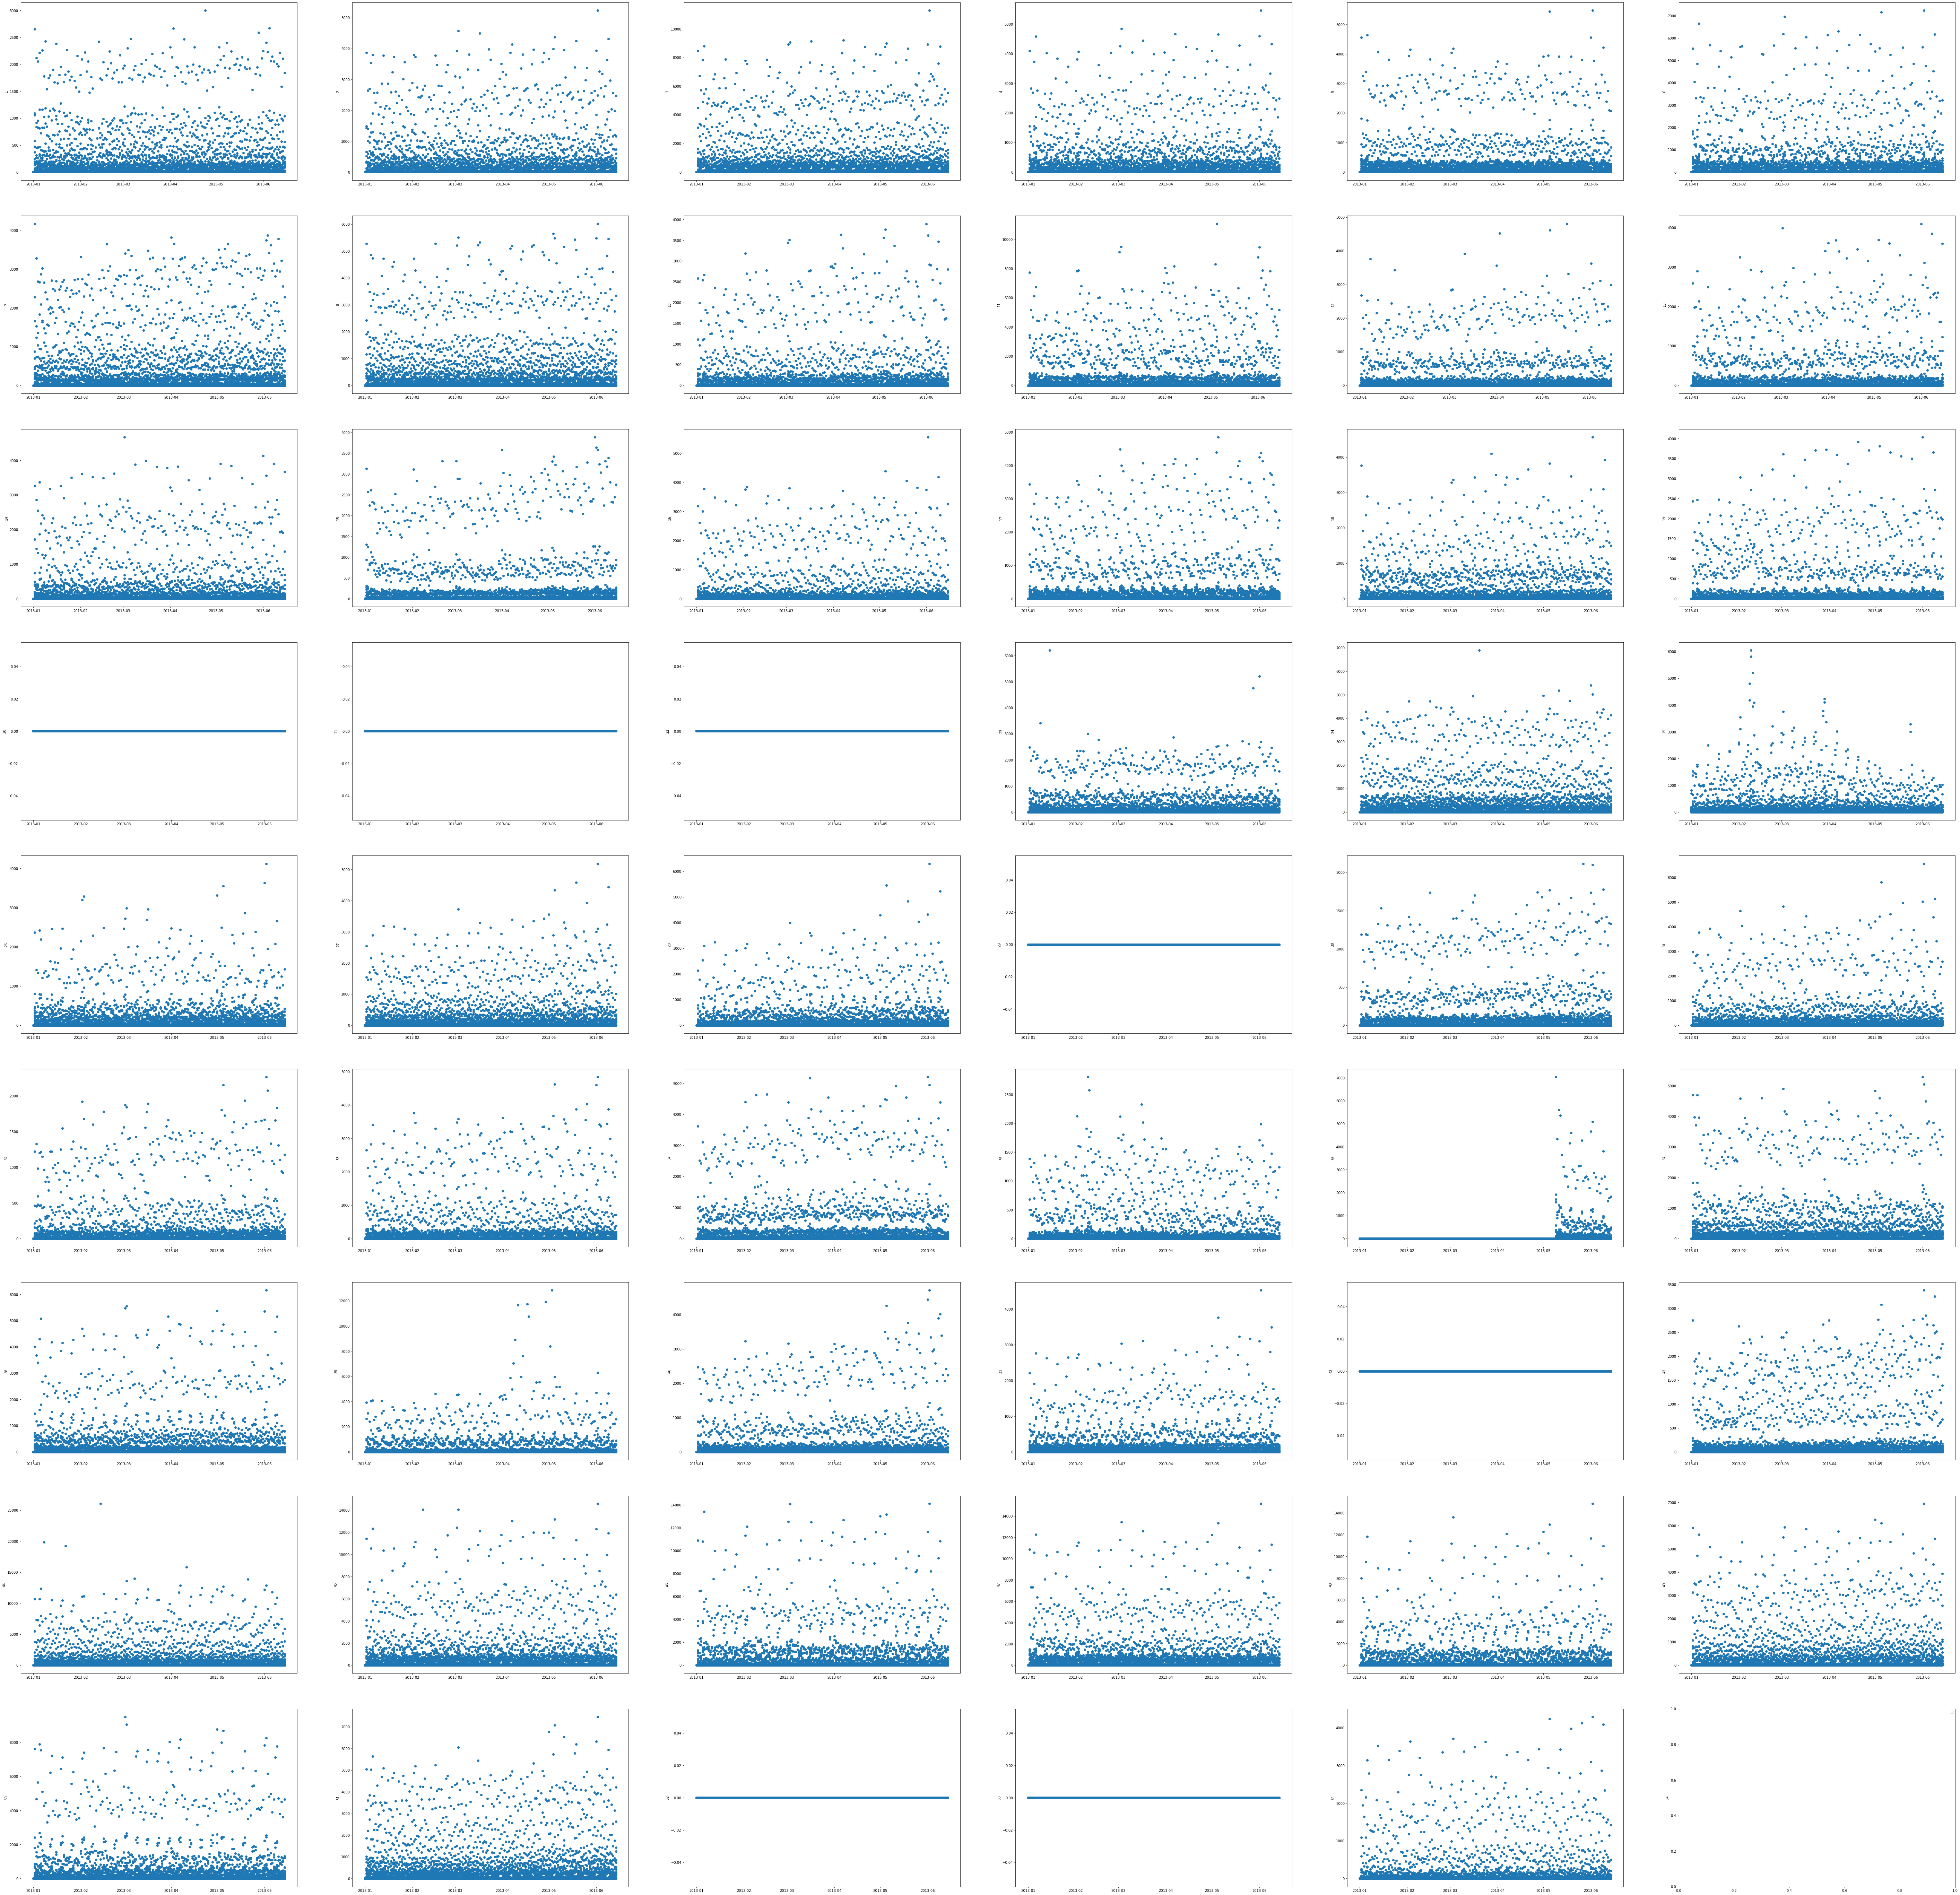

In [ ]:
f,a = plt.subplots(9,6,figsize = [100,100])
j = 0
k = 0
for i in nb_list:
  train_nb = train[train['store_nbr']== i]
  a[j][k].scatter(train_nb['date'],train_nb['sales'])
  a[j][k].set_ylabel(i)
  plt.ylabel(i)
  if k == 5:
    j+=1
    k=0
  else:
    k +=1
plt.legend()
plt.show()

In [ ]:
train_nb1 = train[train['store_nbr']== 1]
train_nb1 = train_nb1[ train_nb1['date'] == '2013-01-01']
train_nb11 = train_nb1['family']
train_nb11

0                     AUTOMOTIVE
1                      BABY CARE
2                         BEAUTY
3                      BEVERAGES
4                          BOOKS
5                   BREAD/BAKERY
6                    CELEBRATION
7                       CLEANING
8                          DAIRY
9                           DELI
10                          EGGS
11                  FROZEN FOODS
12                     GROCERY I
13                    GROCERY II
14                      HARDWARE
15            HOME AND KITCHEN I
16           HOME AND KITCHEN II
17               HOME APPLIANCES
18                     HOME CARE
19                    LADIESWEAR
20               LAWN AND GARDEN
21                      LINGERIE
22              LIQUOR,WINE,BEER
23                     MAGAZINES
24                         MEATS
25                 PERSONAL CARE
26                  PET SUPPLIES
27       PLAYERS AND ELECTRONICS
28                       POULTRY
29                PREPARED FOODS
30        

In [ ]:
tr_set = set(train['family'])
for i in train_nb11:
  if i in tr_set:
    print(i)

AUTOMOTIVE
BABY CARE
BEAUTY
BEVERAGES
BOOKS
BREAD/BAKERY
CELEBRATION
CLEANING
DAIRY
DELI
EGGS
FROZEN FOODS
GROCERY I
GROCERY II
HARDWARE
HOME AND KITCHEN I
HOME AND KITCHEN II
HOME APPLIANCES
HOME CARE
LADIESWEAR
LAWN AND GARDEN
LINGERIE
LIQUOR,WINE,BEER
MAGAZINES
MEATS
PERSONAL CARE
PET SUPPLIES
PLAYERS AND ELECTRONICS
POULTRY
PREPARED FOODS
PRODUCE
SCHOOL AND OFFICE SUPPLIES
SEAFOOD


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54704 entries, 0 to 54703
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           54704 non-null  int64         
 1   date         54703 non-null  datetime64[ns]
 2   store_nbr    54703 non-null  float64       
 3   family       54703 non-null  object        
 4   sales        54703 non-null  float32       
 5   onpromotion  54703 non-null  float32       
dtypes: datetime64[ns](1), float32(2), float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [ ]:
train.groupby(['date','store_nbr']).sales.sum()

date        store_nbr
2013-01-01  1.0             0.000000
            2.0             0.000000
            3.0             0.000000
            4.0             0.000000
            5.0             0.000000
                            ...     
2013-01-31  39.0         5249.048828
            40.0         3751.416016
            41.0         3284.389893
            42.0            0.000000
            43.0         3346.000000
Name: sales, Length: 1658, dtype: float32

In [ ]:
train_mer = pd.merge(train.groupby(['date','store_nbr']).sales.sum().reset_index(),trans,how = 'left')
train_mer

,date,store_nbr,sales,transactions
0,2013-01-01,1.0,0.000000,NaN
1,2013-01-01,2.0,0.000000,NaN
2,2013-01-01,3.0,0.000000,NaN
3,2013-01-01,4.0,0.000000,NaN
4,2013-01-01,5.0,0.000000,NaN
...,...,...,...,...
1653,2013-01-31,39.0,5249.048828,1218.0
1654,2013-01-31,40.0,3751.416016,911.0
1655,2013-01-31,41.0,3284.389893,728.0
1656,2013-01-31,42.0,0.000000,NaN


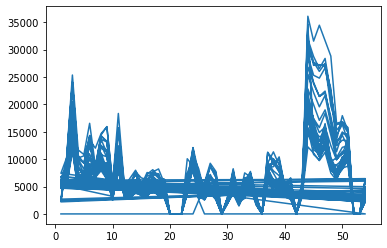

In [ ]:
plt.plot(train_mer['store_nbr'],train_mer['sales'])
plt.show()

In [ ]:
trans_sales = px.scatter(train_mer,x = 'transactions',y = 'sales',
                         trendline = 'ols',trendline_color_override= 'red')
trans_sales.show()
# transaction 증가 -> sale 증가

In [ ]:
trans1 = trans.copy()
trans1['year'] = trans1.date.dt.year
trans1['month'] = trans1.date.dt.month
trans1['week'] = trans1.date.dt.dayofweek
trans1['day'] = trans1.date.dt.day
trans1

,date,store_nbr,transactions,year,month,week,day
0,2013-01-01,25,770,2013,1,1,1
1,2013-01-02,1,2111,2013,1,2,2
2,2013-01-02,2,2358,2013,1,2,2
3,2013-01-02,3,3487,2013,1,2,2
4,2013-01-02,4,1922,2013,1,2,2
...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,8,1,15
83484,2017-08-15,51,1573,2017,8,1,15
83485,2017-08-15,52,2255,2017,8,1,15
83486,2017-08-15,53,932,2017,8,1,15


In [ ]:
week_g = trans1.groupby(['year','week']).transactions.mean().reset_index()
week_plot = px.line(week_g,x = 'week', y = 'transactions',color = 'year')
week_plot.show()
# 토, 일 방문자 수가 당연히 많음

In [ ]:
day_g = trans1.groupby(['year','day']).transactions.mean().reset_index()
day_g
day_plot = px.line(day_g,x = 'day', y = 'transactions',color = 'year')
day_plot.show()
# 월 말, 25 ~ 30 사이에 방문자 수 적음, 반면에 월초에 높음

In [ ]:
# Guide 내용
# train의 특정 store의 일부분에는 의미 없는(null?) 값이 있음
# store 오픈 전이거나 혹은 쉬었던 날?

In [ ]:
c = train.groupby(['store_nbr','family']).sales.sum().reset_index()
c = c[c.sales == 0]
c
# 삭제해도 되는 데이터?

,store_nbr,family,sales
1,1.0,BABY CARE,0.0
4,1.0,BOOKS,0.0
6,1.0,CELEBRATION,0.0
15,1.0,HOME AND KITCHEN I,0.0
16,1.0,HOME AND KITCHEN II,0.0
...,...,...,...
1772,54.0,MAGAZINES,0.0
1775,54.0,PET SUPPLIES,0.0
1776,54.0,PLAYERS AND ELECTRONICS,0.0
1779,54.0,PRODUCE,0.0


In [ ]:
sales_g = train.groupby(['date']).sales.sum().reset_index()
sales_g

,date,sales
0,2013-01-01,2511.618896
1,2013-01-02,496092.406250
2,2013-01-03,361461.218750
3,2013-01-04,354459.687500
4,2013-01-05,477350.125000
5,2013-01-06,519695.406250
6,2013-01-07,336122.812500
7,2013-01-08,318347.781250
8,2013-01-09,302530.812500
9,2013-01-10,258982.000000


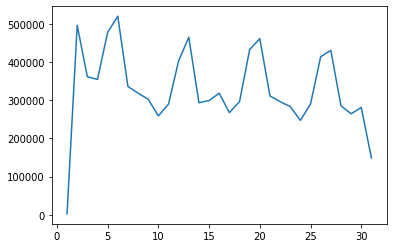

In [ ]:
plt.plot(sales_g.date.dt.day, sales_g.sales)
plt.show()

In [ ]:
# 율